In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
train_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [4]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
test_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt"
test_df = pd.read_csv(test_path, sep=':::', names=['Title', 'Description'], engine='python')
test_df

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [5]:
test_sol_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt"
test_sol_df = pd.read_csv(test_sol_path, sep=':::', names=['Title', 'Genre','Description'], engine='python')
test_sol_df

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [6]:
df=train_data

In [8]:
#df['Title + Description'] = df['Title'] + ' ' + df['Description']
#test_df['Title + Description'] = test_df['Title'] + ' ' + test_df['Description']

In [9]:
df.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [10]:
df.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [11]:
print(df['Genre'].unique())
print(df.describe())

[' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' ' adventure ' ' talk-show ' ' western '
 ' family ' ' mystery ' ' history ' ' news ' ' biography ' ' romance '
 ' game-show ' ' musical ' ' war ']
                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [12]:
print(df['Title'].describe())

count                              54214
unique                             54214
top        Oscar et la dame rose (2009) 
freq                                   1
Name: Title, dtype: object


In [13]:
df.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


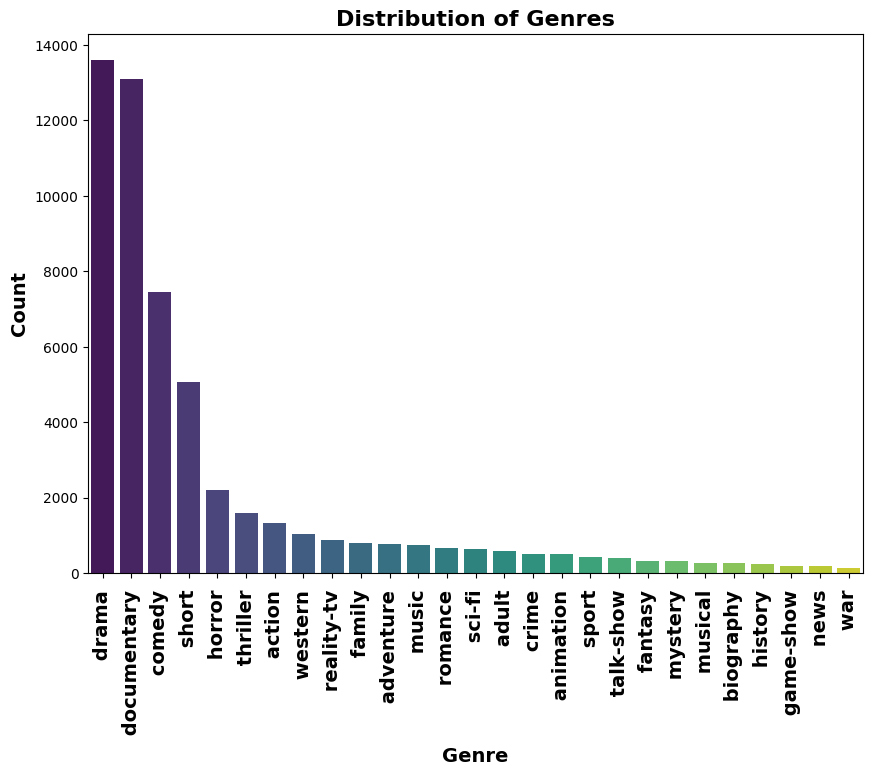

In [14]:
plt.figure(figsize=(10, 7))
counts=df['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder = LabelEncoder()
df["genre_encoded"] = label_encoder.fit_transform(df["Genre"].tolist())
df = df[["Title", "Genre", "Description","genre_encoded"]]
df

,Title,Genre,Description,genre_encoded
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,5
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,13
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",7
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,5


In [9]:
import re  # used for pattern matching and text manipulation.
import string 
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning 
from nltk.stem import LancasterStemmer

In [10]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z.,+;!?]', ' ', text)  # Change to replace non-characters with a space
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2 or i in '.,;!?+'])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

df["TextCleaning"] = df["Description"].apply(cleaning_data)
test_df["TextCleaning"] = test_df["Description"].apply(cleaning_data)

In [11]:
df.head(5)

,Title,Genre,Description,genre_encoded,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,"listening conversation doctor parents , year o..."
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,"help unemployed father make ends meet , edith ..."
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,film title refers recovered bodies ground zero...


In [12]:
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(df['TextCleaning'])
#X_train_text=tfidf_vectorizer.fit_transform(df['Title + Description'])
X_test = tfidf_vectorizer.transform(test_df['TextCleaning'])
#X_test_text=tfidf_vectorizer.fit_transform(test_df['Title + Description'])
X_train

<54214x116762 sparse matrix of type '<class 'numpy.float64'>'
	with 2610563 stored elements in Compressed Sparse Row format>

In [13]:
X_test

<54200x116762 sparse matrix of type '<class 'numpy.float64'>'
	with 2553750 stored elements in Compressed Sparse Row format>

In [14]:
y_train=df['genre_encoded']
test_sol_df["genre_encoded"] = label_encoder.fit_transform(test_sol_df["Genre"].tolist())
y_test=test_sol_df["genre_encoded"]
y_train

1         8
2        24
3         1
4         8
5         8
         ..
54210     5
54211    13
54212     7
54213     5
54214    12
Name: genre_encoded, Length: 54214, dtype: int64

In [20]:
df.describe()

,genre_encoded
count,54214.000000
mean,10.090733
std,6.389483
min,0.000000
25%,7.000000
50%,8.000000
75%,13.000000
max,26.000000


In [15]:
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [22]:
X_train.shape

(54214, 121110)

In [23]:
#X_train_t, X_val_t, y_train_t, y_val_t = train_test_split(X_train_text, y, test_size=0.2, random_state=42)


In [24]:
#X_train1, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)


In [16]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lr = classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_lr)
print("test Accuracy using only description:", accuracy)

test Accuracy using only description: 0.5893357933579336


In [17]:
nb_classifier=MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy_nb = accuracy_score(y_test, y_pred)
print("Validation Accuracy of multinomialNB using only description:", accuracy_nb)


Validation Accuracy of multinomialNB using only description: 0.4442988929889299


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state = 42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the performance of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("test Accuracy of random forest classifier using only description:", accuracy_rf)

test Accuracy of random forest classifier using only description: 0.48732472324723247


In [19]:
log_clf = LogisticRegression(random_state=42,max_iter=1000)
rf_clf = RandomForestClassifier(random_state=42)
nb_clf=MultinomialNB()

# Create the ensemble model using VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf),('nb', nb_clf)], voting='hard')

# Train the ensemble model (this will train the individual models)
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_en = voting_clf.predict(X_test)

# Evaluate the model
accuracy_en = accuracy_score(y_test, y_pred_en)
print(accuracy_en)

0.5023985239852399


In [20]:
Evaluation = pd.DataFrame({'Naive Bayes Model': [accuracy_nb],
                           'Logistic Regression Model':[accuracy],
                          'Random Forest Model' :[accuracy_rf],
                          'ensamble of 3 model' :[accuracy_en]}, index=['Accuracy'])
Evaluation

,Naive Bayes Model,Logistic Regression Model,Random Forest Model,ensamble of 3 model
Accuracy,0.444299,0.589336,0.487325,0.502399


In [21]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.53      0.26      0.35      1314
           1       0.63      0.20      0.31       590
           2       0.72      0.15      0.24       775
           3       0.62      0.03      0.05       498
           4       0.00      0.00      0.00       264
           5       0.54      0.59      0.57      7446
           6       0.38      0.02      0.03       505
           7       0.66      0.87      0.75     13096
           8       0.54      0.80      0.64     13612
           9       0.54      0.08      0.13       783
          10       0.67      0.02      0.04       322
          11       0.93      0.49      0.64       193
          12       0.00      0.00      0.00       243
          13       0.67      0.57      0.62      2204
          14       0.70      0.41      0.51       731
          15       1.00      0.01      0.01       276
          16       0.00      0.00      0.00       318
          17       0.88    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


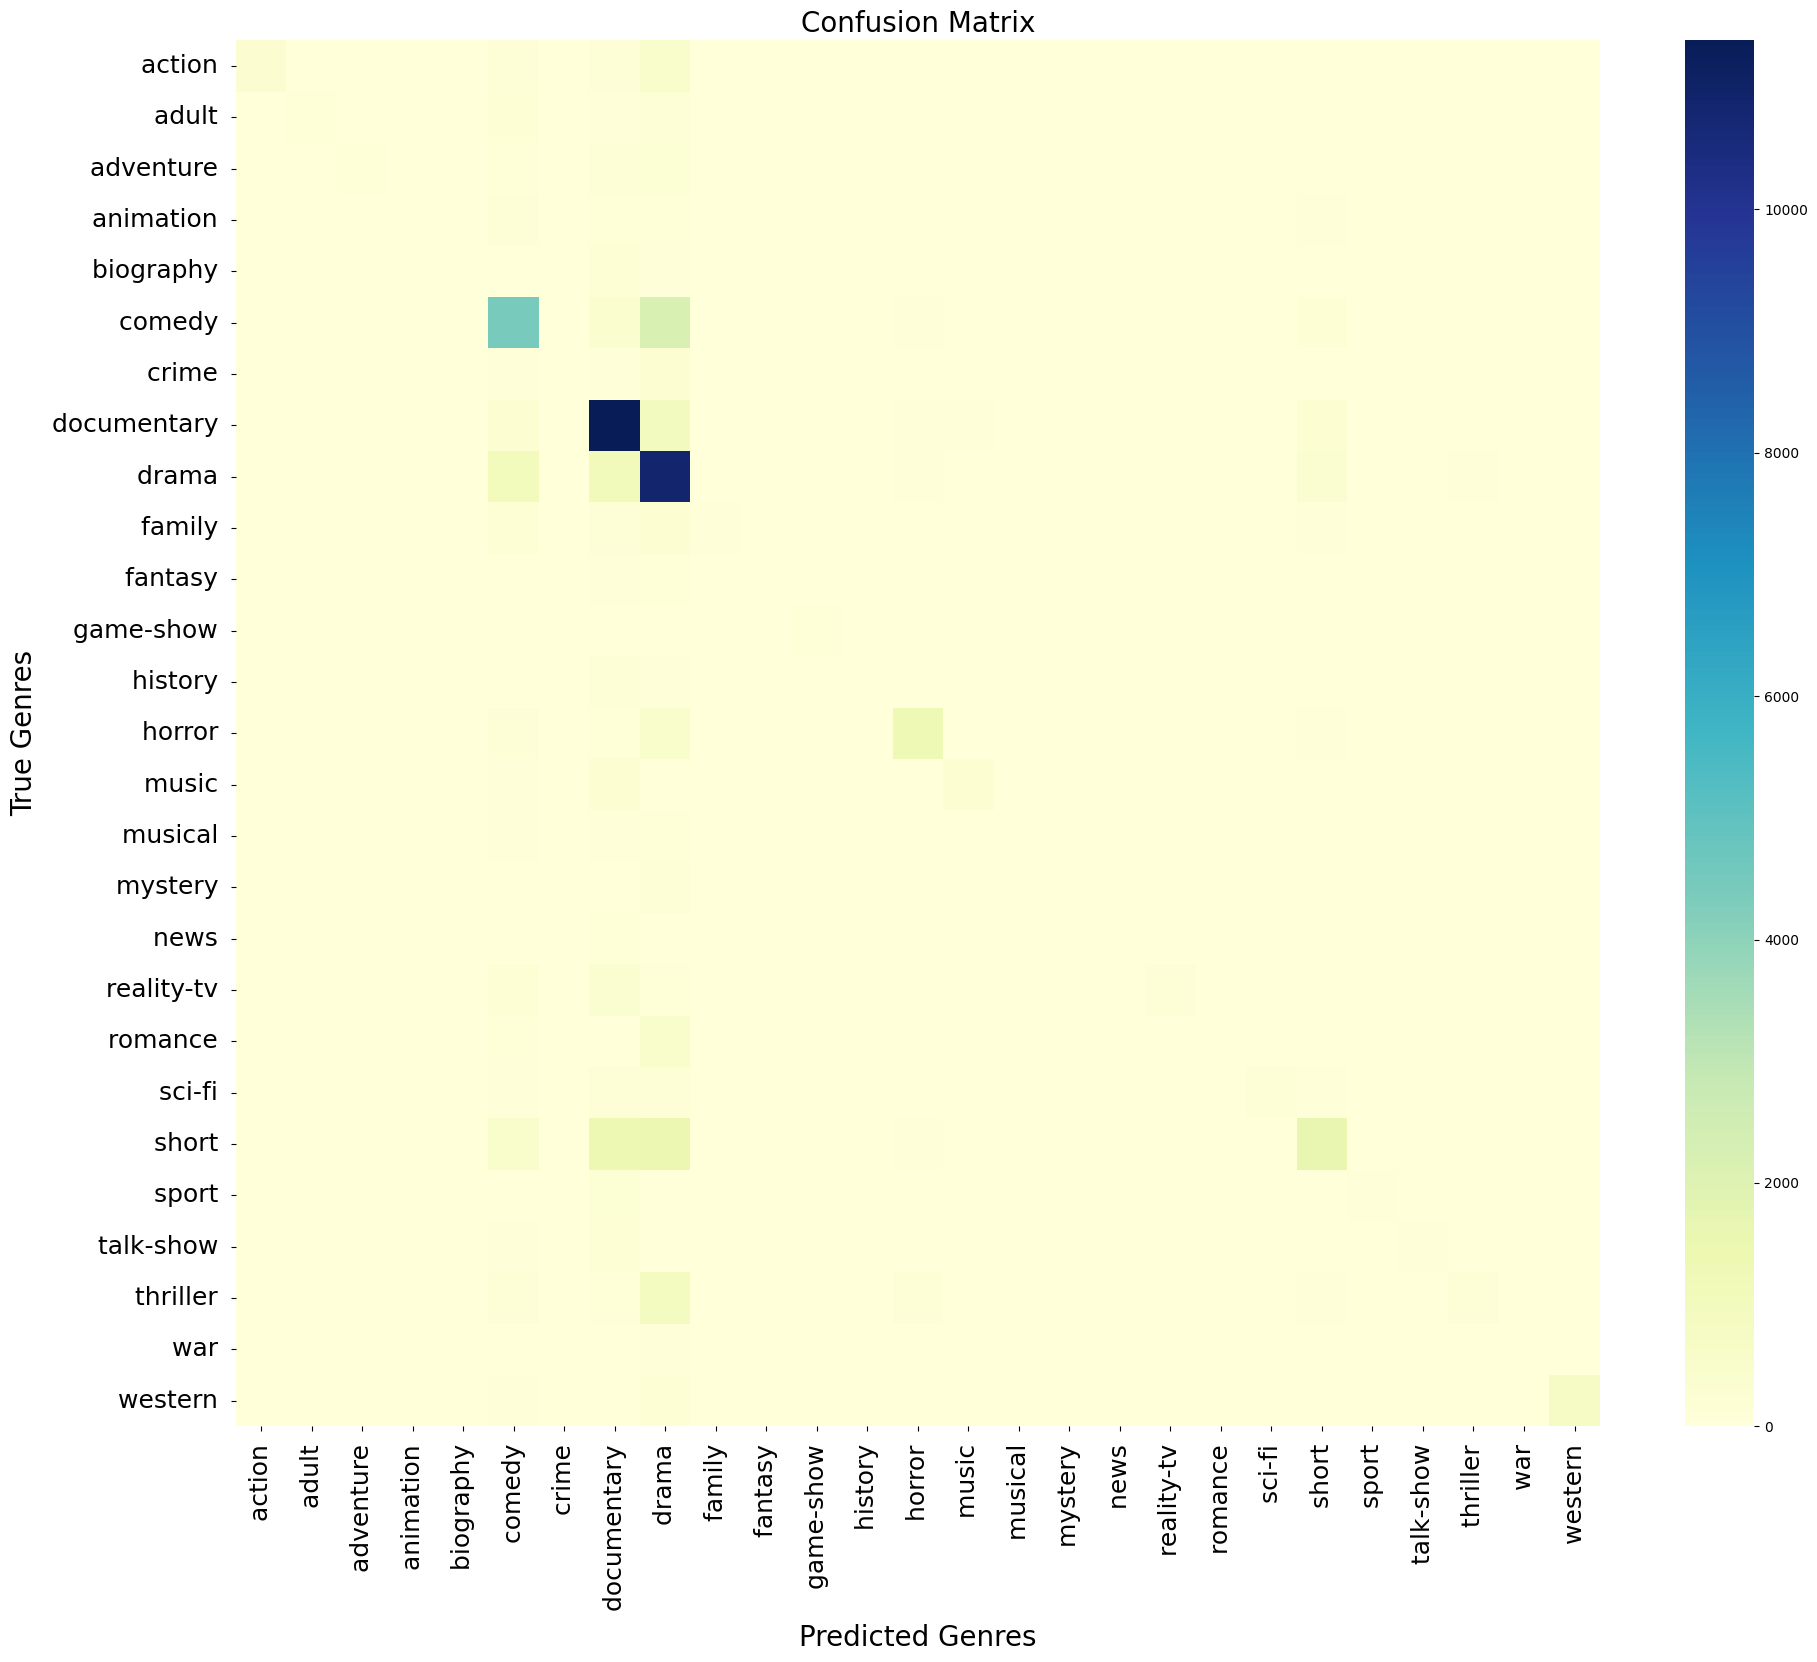

In [40]:
class_labels = list(label_encoder.classes_)
plt.figure(figsize=(22,18))
cf_matrix = confusion_matrix( y_test,y_pred_lr)
ax = sns.heatmap(cf_matrix, annot=False, cmap="YlGnBu")
ax.set_xlabel('Predicted Genres', fontsize=20)
ax.set_ylabel('True Genres', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.set_xticklabels(class_labels, rotation=90, fontsize=18)
ax.set_yticklabels(class_labels, rotation=0, fontsize=18)

plt.show()